In [1]:
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import pygrib
import urllib.request

In [2]:
# Download the data file
url='ftp://ftp.ncep.noaa.gov/pub/data/nccf/com/557ww/prod/557ww.20181006/'
fn='GLOBAL.grib2.2018100600.0216'
urllib.request.urlretrieve(url + fn, 'data/' + fn)

# Load the data
grbs = pygrib.open('data/' + fn)

In [3]:
# Get an array of all temps
t2mens = []
for grb in grbs:
    if grb.parameterName == 'Temperature': 
        t2mens.append(grb.values)
t2mens = np.array(t2mens)

# Get geolocations
lats, lons = grb.latlons()  # get the lats and lons for the grid.

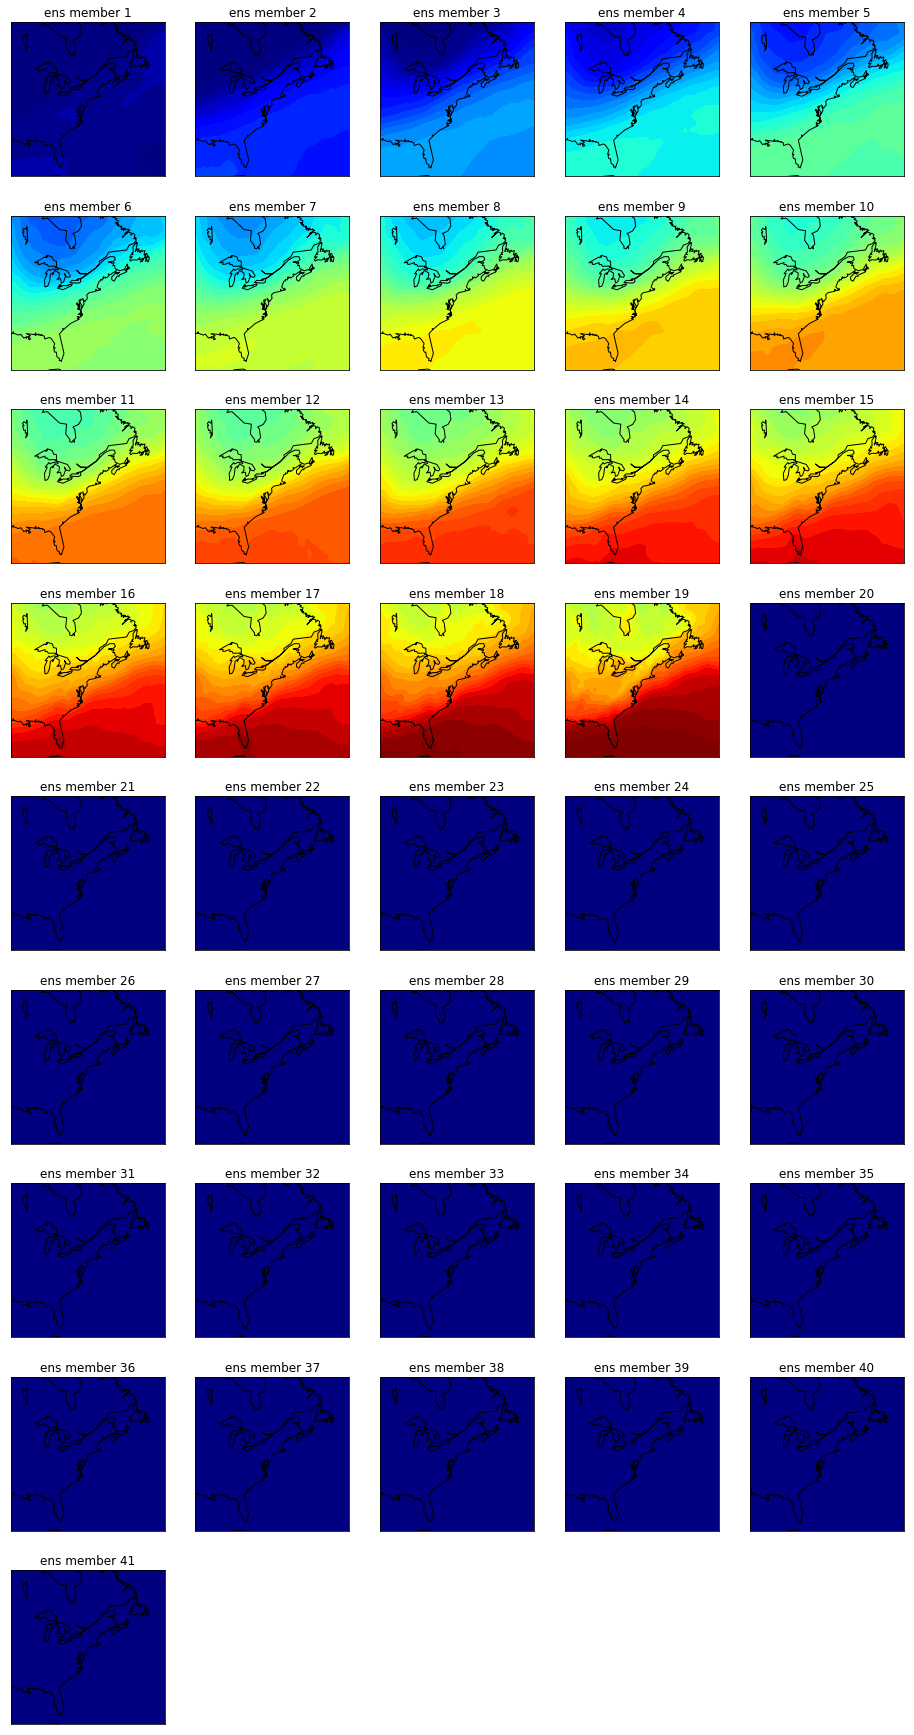

In [6]:
# Plot temp 
fig = plt.figure(figsize=(16,35))
m = Basemap(projection='lcc',lon_0=-74,lat_0=41,width=4.e6,height=4.e6)
x,y = m(lons,lats)
for nens in range(1,len(t2mens)):
    ax = plt.subplot(10,5,nens)
    m.drawcoastlines()
    cs = m.contourf(x,y,t2mens[nens],np.linspace(230,300,41),cmap=plt.cm.jet,extend='both')
    t = plt.title('ens member %s' % nens)